In [118]:
%matplotlib inline
import argparse
import csv
import logging
import os
import random
import sys
import pickle
import time
import numpy as np
from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from bert_util import *

In [119]:
sst_processor = Sst2Processor()
train_examples = sst_processor.get_train_examples('data/', 10000)
test_examples = sst_processor.get_dev_examples('data/')

In [777]:
interested_test_idx = 7

for te in test_examples:
    if te.guid == interested_test_idx:
        print(te.guid)
        print(colored(te.text_a, "blue"), te.label)
        break

7
a sometimes tedious film .  0


In [778]:
test_tok_sal_list, train_tok_sal_lists, test_pred_status = pickle.load(open("from_aws/SA_influence_output_bert_e3/saliency_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [779]:
test_pred_status

'wrong'

In [780]:
top_sal_ix = [_ix for _ix, _ in sorted(enumerate(test_tok_sal_list), key=lambda x: -x[1][1])][:3]
for ix, (tok, sal) in enumerate(test_tok_sal_list):
    if ix in top_sal_ix:
        print(colored(tok + '\t' + str(sal), "green"))
    else:
        print(tok + '\t' + str(sal))

[CLS]	0.015014335
a	0.07373888
sometimes	0.19994108
ted	-0.45029685
##ious	0.0042031133
film	-0.031940274
.	-0.015620316
[SEP]	0.20924518


In [701]:
influences = pickle.load(open("from_aws/SA_influence_output_bert_e3/influences_test_" + str(interested_test_idx) + ".pkl", "rb"))
influences = stats.zscore(influences)

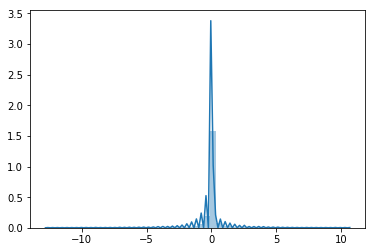

In [702]:
sns.distplot(influences)

In [781]:
order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 50

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["0", "1"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), te.label)
        print(influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

that is the recording industry in the current climate of mergers and downsizing  1
10.639200649596948

credulous  1
10.31750199733332

an admittedly middling film  1
10.089876607594137

a simplistic narrative and  1
9.58304008623507

of its lurid fiction  1
9.562215268737136

emphasising her plight and isolation  1
9.32987502927439

fresh-faced  1
8.944831714990082

the moral shrapnel and mental shellshock will linger long after this film has ended .  1
8.679149077435186

a wacky , screwball comedy  1
8.009928162592445

, uninhibited  1
7.907095762659791

-- in a heartwarming , nonjudgmental kind of way --  1
7.736436456151405

even more haunting than those in mr. spielberg 's 1993 classic  1
7.302532112845863

's at once laughable and compulsively watchable ,  1
7.215885736873468

has thankfully ditched the saccharine sentimentality of bicentennial man in favor of an altogether darker side .  1
7.203777592079953

of this laughable dialogue  1
7.190666773235803

had more to do with ima

In [782]:
order_of_interest = "min"
label_of_interest = "both"
num_of_interest = 50

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["0", "1"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), te.label)
        print(influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

full of cheesy dialogue ,  0
-12.777377156857467

visually flashy but narratively opaque and  0
-11.009831396799132

luridly graphic and  0
-9.974680720987514

a maddeningly insistent and repetitive piano score that made me want to scream  0
-9.971558614556773

tedious norwegian offering which somehow snagged an oscar nomination .  0
-9.63839512607194

a beyond-lame satire , teddy bears ' picnic ranks among the most pitiful directing debuts by an esteemed writer-actor .  0
-8.975615536372441

far too clever by half , howard 's film is really a series of strung-together moments , with all the spaces in between filled with fantasies , daydreams , memories and one fantastic visual trope after another .  0
-8.975114833148673

its cheesy screenplay  0
-8.840129046829933

law enforcement , and a visceral , nasty journey  0
-8.825514216909829

of hard-bitten , cynical journalists  0
-8.71716710969868

freaking out  0
-7.759545574576024

point at things that explode into flame  0
-7.6249679564